In [1]:
%matplotlib notebook
from QDP import qdp
import os.path
import numpy as np
from scipy.stats import poisson
import h5py
import matplotlib.pyplot as plt
from scipy.optimize import leastsq,curve_fit

In [2]:
#analysis_master_path='Y:/Rb/Analysis/' # Y:\ is network drive connected to Hexagon E:\Rb\

exp_id='2018_05_22_14_02_44_780 horizontal aom alignment using Ramsey'
data_master_path='D:/Data/' # D:\ is local SSD in the main experiment computer
exp_date="_".join(exp_id.split("_")[:3]) # Date folder name automatically generated from exp name.
exp_path=data_master_path+exp_date+'/'+exp_id+'/'
experiment_file='results.hdf5'
dp=exp_path
cuts = [[450],[450],[450]]

q = qdp.QDP(base_data_path=dp)
q.load_data_file(experiment_file)
for r in range(5):
    q.set_thresholds(cuts, roi=r)

In [3]:
q.experiments[0]['variable_list']
xlab = q.experiments[0]['variable_desc'][q.experiments[0]['variable_list'][0]]['description']
q.get_thresholds()
retention = q.apply_thresholds()
#np.squeeze(retention['retention'])

In [4]:
tbl_str = "ivar:\t{0:.2f}\tretention:{1:.3f} +- {2:.3f}"
for i in range(len(retention['retention'].flatten())):
    print(tbl_str.format(
        retention['ivar'].flatten()[i],
        retention['retention'].flatten()[i],
        retention['error'].flatten()[i]
    ))

ivar:	147.00	retention:0.750 +- 0.044
ivar:	147.00	retention:0.815 +- 0.044
ivar:	147.00	retention:0.800 +- 0.044
ivar:	147.00	retention:0.787 +- 0.044
ivar:	147.00	retention:0.529 +- 0.044
ivar:	148.00	retention:0.588 +- 0.029
ivar:	148.00	retention:0.896 +- 0.029
ivar:	148.00	retention:0.800 +- 0.029
ivar:	148.00	retention:0.786 +- 0.029
ivar:	148.00	retention:0.429 +- 0.029
ivar:	149.00	retention:0.395 +- 0.038
ivar:	149.00	retention:0.852 +- 0.038
ivar:	149.00	retention:0.848 +- 0.038
ivar:	149.00	retention:0.759 +- 0.038
ivar:	149.00	retention:0.469 +- 0.038
ivar:	150.00	retention:0.472 +- 0.044
ivar:	150.00	retention:0.787 +- 0.044
ivar:	150.00	retention:0.833 +- 0.044
ivar:	150.00	retention:0.851 +- 0.044
ivar:	150.00	retention:0.548 +- 0.044
ivar:	151.00	retention:0.697 +- 0.039
ivar:	151.00	retention:0.831 +- 0.039
ivar:	151.00	retention:0.818 +- 0.039
ivar:	151.00	retention:0.773 +- 0.039
ivar:	151.00	retention:0.514 +- 0.039
ivar:	152.00	retention:0.842 +- 0.048
ivar:	152.00

In [5]:
def sin(t,amp,freq,phase,offset):
    res = (amp*np.sin((2*np.pi*freq*t)+phase)) + offset
    return res 

def decaying_sin(t,tau,amp,freq,phase,offset):
    res = (amp*np.exp(-t/tau)*np.sin((2*np.pi*freq*t)+phase)) + offset
    return res 

def est_freq(ydata,tgap,tau,amp,freq,phase,offset): # Estimation of frequency change (from dy/df where y=sinusoidal fit)
    res=(ydata-decaying_sin(tau,tgap,amp,freq,phase,offset))/(amp*np.exp(-tgap/tau)*2*np.pi*tgap*np.cos(2*np.pi*freq*tgap+phase))
    return res

def gaussian(x,amp,x0,sigma,offset):
    res=(amp*np.exp((-(x-x0)**2)/(sigma**2)))+offset
    return res

<IPython.core.display.Javascript object>


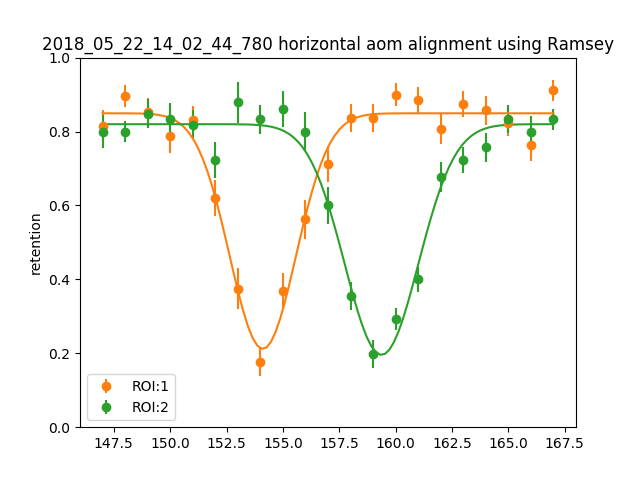

ROI:1, amplitude : -0.637363709441, location: 154.109245316 , sigma:2.07642257288, offset:0.849321807473
ROI:2, amplitude : -0.624205891466, location: 159.374207219 , sigma:2.30698268074, offset:0.819832981031


In [6]:
colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728','#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
fig, ax = plt.subplots()
fit_guesses=[0.5,160,2,0]
roi_dependency=[0,5,0,0]
fitted_parameters=[]
for roi in [1,2]:
    
    data = []
    reten = []
    err = []
    for e in range(len(np.squeeze(retention['ivar']))):
        data.append(np.squeeze(retention['ivar'])[e][roi])
        reten.append(np.squeeze(retention['retention'])[e][roi])
        err.append(np.squeeze(retention['error'])[e][roi])
    ax.errorbar(data,reten,yerr=err,label="ROI:{}".format(roi),fmt='o',color=colors[roi])
    guesses=np.add(fit_guesses,np.ones(len(fit_guesses))*(roi-2)*roi_dependency)
    fit = curve_fit(gaussian,data,reten,guesses)
    print "ROI:{}, amplitude : {}, location: {} , sigma:{}, offset:{}".format(roi,fit[0][0],fit[0][1],fit[0][2],fit[0][3])
    fitted_parameters.append(fit[0])
    #print fit[0]
    xarray=np.linspace(np.min(data),np.max(data),100)
    yfit=gaussian(xarray, np.float(fit[0][0]),np.float(fit[0][1]),np.float(fit[0][2]),np.float(fit[0][3]))
    plt.plot(xarray,yfit,color=colors[roi])

plt.show()
ax.set_title(exp_id)
ax.set_ylim(0, 1)
ax.set_xlabel(xlab)
ax.set_ylabel('retention')
ax.legend()

In [7]:
(154.109245316+159.374207219)/2

156.74172626749998